### **TRABALHO 2.2**
### **Análise de uma estrutura idealizada no _software Ftool_ - Resposta a um impacto**

_Mestrado em Engenharia Civil na Área de Estruturas / Universidade Federal do Rio Grande do Sul_

_PPGEC-UFRGS / PEC00025 - Introdução à Teoria de Vibrações_

**Docente:** Marcelo Maia Rocha

**Discente:** Pedro Henrique Fontes Silva // **Matrícula:** 00312234


### 1. Introdução

Este trabalho, realizado na disciplina Introdução à Teoria de Vibrações (PEC00025), tem como finalidade o desenvolvimento de uma estrutura com no mínimo 10 nós, modelada através do _software Ftool_ para análises posteriores. Nessa etapa, realizou-se a montagem de um pórtico em concreto armado contendo 13 nós verticais e 3 nós horizontais, conforme Figura 1.

                         Figura 1 – Estrutura realizada no software Ftool
<img src="Pictures/Portico.png" alt="Portico" width="200px"/>

Os dados referentes ao projeto idealizado para a estrutura estão dispostos na Tabela 1.
                        
                                  Tabela 1 – Dados da estrutura
<img src="Pictures/Tabela1.png" alt="Tabela1" width="300px"/>

### 2. Matrizes de Flexibilidade (H), Rigidez (K) e Massa (M)

Dando sequência ao trabalho, realizou-se o seguinte procedimento para análise da estrutura com múltiplos graus de liberdade: através da inserção de uma carga de 1kN no último nó do modelo, foram anotados em uma planilha no _software_ Excel, o deslocamento em todos os nós, dispondo-os em uma coluna de uma matriz. Este processo foi repetido para todos os nós da estrutura, gerando uma matriz da ordem 13x13, onde dividindo-a pelo módulo da força aplicada, obteve-se a **matriz de flexibilidade (H)**, apresentada na Tabela 2. 

                         Tabela 2 – Matriz de flexibilidade da estrutura
<img src="Pictures/Tabela2.png" alt="Tabela2" width="800px"/>

Através da matriz de flexibilidade, obtem-se a **matriz de rigidez (K)** representada na Tabela 3, realizando o cálculo da inversa da matriz H.

                            Tabela 3 – Matriz de rigidez da estrutura
<img src="Pictures/Tabela3.png" alt="Tabela3" width="800px"/>

Para a montagem da **matriz de massa** da estrutura, deve-se considerar que o edifício apresenta uma relação de 400 kg/m³. Sendo assim, para o cálculo da massa correspondente a cada nó, deve-se considerar que a laje de cada pavimento seja quadrada, tem-se então que 4 m x 4 m = 16 m².

Considerando as diferentes alturas dos pavimentos entre os nós, temos:

h = 3 m -> 16 m² ∙ 3 m = 48 m³, portanto 48 m³ ∙ 400 kg/m³ = 19200 kg;

h = 4 m -> 16 m² ∙ 4 m = 64 m³, portanto 64 m³ ∙ 400 kg/m³ = 25600 kg;

No entanto, após a divisão dos pavimentos pela metade, em que duas dessas áreas influenciam os nós, temos que para o primeiro nó deve-se considerar apenas metade dessa massa, ou seja, 9600 kg, e ainda, considerando a altura de 4 m no 1º pavimento e o pavimento superior de 3 m, temos uma massa de 22400 kg (19200/2 + 25600/2) para o nó 13. Sendo assim, a Tabela 4 apresenta a matriz de massa da estrutura.

                             Tabela 4 – Matriz de massa da estrutura
<img src="Pictures/Tabela4.png" alt="Tabela4" width="500px"/>

### 3. Frequência fundamental

Para encontrar as frequências fundamentais e os modos de vibração da estrutura, foram realizadas operações através desse _notebook_ no _software Python_, conforme os comandos seguintes. As matrizes de flexibilidade e massa foram inseridas para auxiliar no procedimento de determinação das variáveis, utilizando ainda as definições de autovalores e autovetores.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

In [35]:
# Flexibility coefficients in m/N
H1 = np.array([[10.8, 9.82, 8.80, 7.79, 6.80, 5.85, 4.94, 4.07, 3.27, 2.54, 1.88, 1.30, 0.797], 
               [9.82, 9.14, 8.25, 7.34, 6.43, 5.55, 4.71, 3.91, 3.15, 2.46, 1.83, 1.28, 0.789], 
               [8.80, 8.25, 7.67, 6.89, 6.07, 5.26, 4.48, 3.74, 3.03, 2.38, 1.79, 1.26, 0.782], 
               [7.79, 7.34, 6.89, 6.39, 5.70, 4.97, 4.26, 3.57, 2.91, 2.30, 1.74, 1.24, 0.775], 
               [6.80, 6.43, 6.07, 5.70, 5.29, 4.68, 4.03, 3.40, 2.79, 2.22, 1.69, 1.21, 0.767],
               [5.85, 5.55, 5.26, 4.97, 4.68, 4.34, 3.80, 3.23, 2.68, 2.14, 1.65, 1.19, 0.760],
               [4.94, 4.71, 4.48, 4.26, 4.03, 3.80, 3.53, 3.06, 2.56, 2.06, 1.60, 1.17, 0.753],
               [4.07, 3.91, 3.74, 3.57, 3.40, 3.23, 3.06, 2.85, 2.43, 1.99, 1.55, 1.14, 0.745],
               [3.27, 3.15, 3.03, 2.91, 2.79, 2.68, 2.56, 2.43, 2.27, 1.90, 1.50, 1.12, 0.738],
               [2.54, 2.46, 2.38, 2.30, 2.22, 2.14, 2.06, 1.99, 1.90, 1.78, 1.46, 1.10, 0.731],
               [1.88, 1.83, 1.79, 1.74, 1.69, 1.65, 1.60, 1.55, 1.50, 1.46, 1.37, 1.07, 0.723],
               [1.30, 1.28, 1.26, 1.24, 1.21, 1.19, 1.17, 1.14, 1.12, 1.10, 1.07, 1.01, 0.713],
               [0.797, 0.789, 0.782, 0.775, 0.767, 0.760, 0.753, 0.745, 0.738, 0.731, 0.723, 0.713, 0.644 ]])*1e-6

In [36]:
# Stiffness coefficients in N/m
K1 = np.linalg.inv(H1)

In [37]:
# Lumped mass matrix in kg
M1 = np.array([[0.96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 1.92, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 1.92, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 1.92, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 1.92, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1.92, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1.92, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1.92, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1.92, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.92, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.92, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.92, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.24]])*1e4

In [43]:
# Uses scipy to solve the standard eigenvalue problem
w2, phi = sc.eig(K1, M1)

print('Autovetores:',w2)

print(phi)

Autovetores: [1.75110333e+03+0.j 1.44680262e+03+0.j 1.16971853e+03+0.j
 9.62021316e+02+0.j 8.52749772e+02+0.j 7.41014613e+02+0.j
 4.61852130e+02+0.j 3.06754370e+02+0.j 1.96592663e+02+0.j
 1.05876770e+02+0.j 4.82849836e+01+0.j 1.15670021e+00+0.j
 1.19732600e+01+0.j]
[[ 0.02827991 -0.24395341  0.37003677 -0.48060506  0.18377915 -0.49272571
   0.34769942 -0.43894992  0.39764528 -0.39299777  0.39413403  0.43974407
   0.40460858]
 [-0.0948598   0.28796474 -0.40267174  0.43052228 -0.11637717  0.20225779
  -0.05362306 -0.02171202  0.14100344 -0.22138956  0.28205759  0.41305237
   0.32316786]
 [ 0.27097397 -0.31435343  0.37269274 -0.09745476 -0.06623049  0.35002595
  -0.30983262  0.34007516 -0.24254651  0.07591655  0.10443358  0.38409568
   0.22225256]
 [-0.44043542  0.22625003 -0.2139125  -0.31842561  0.13124126 -0.31975045
  -0.01876675  0.24832484 -0.35051559  0.30636963 -0.09506322  0.35286638
   0.1091564 ]
 [ 0.50712602 -0.04008366 -0.01258753  0.35795652  0.03409327 -0.23009453
   0.365

In [57]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi

print('A menor frequência fundamental da estrutura é =',fk1[0])

print('A Maior frequência fundamental da estrutura é =',fmax)

A menor frequência fundamental da estrutura é = 0.17117113859320784
A Maior frequência fundamental da estrutura é = 6.660027446817577


### 4. Modos de vibração

Os modos de vibração das 4 primeiras frequências da estrutura são apresentados, a seguir:

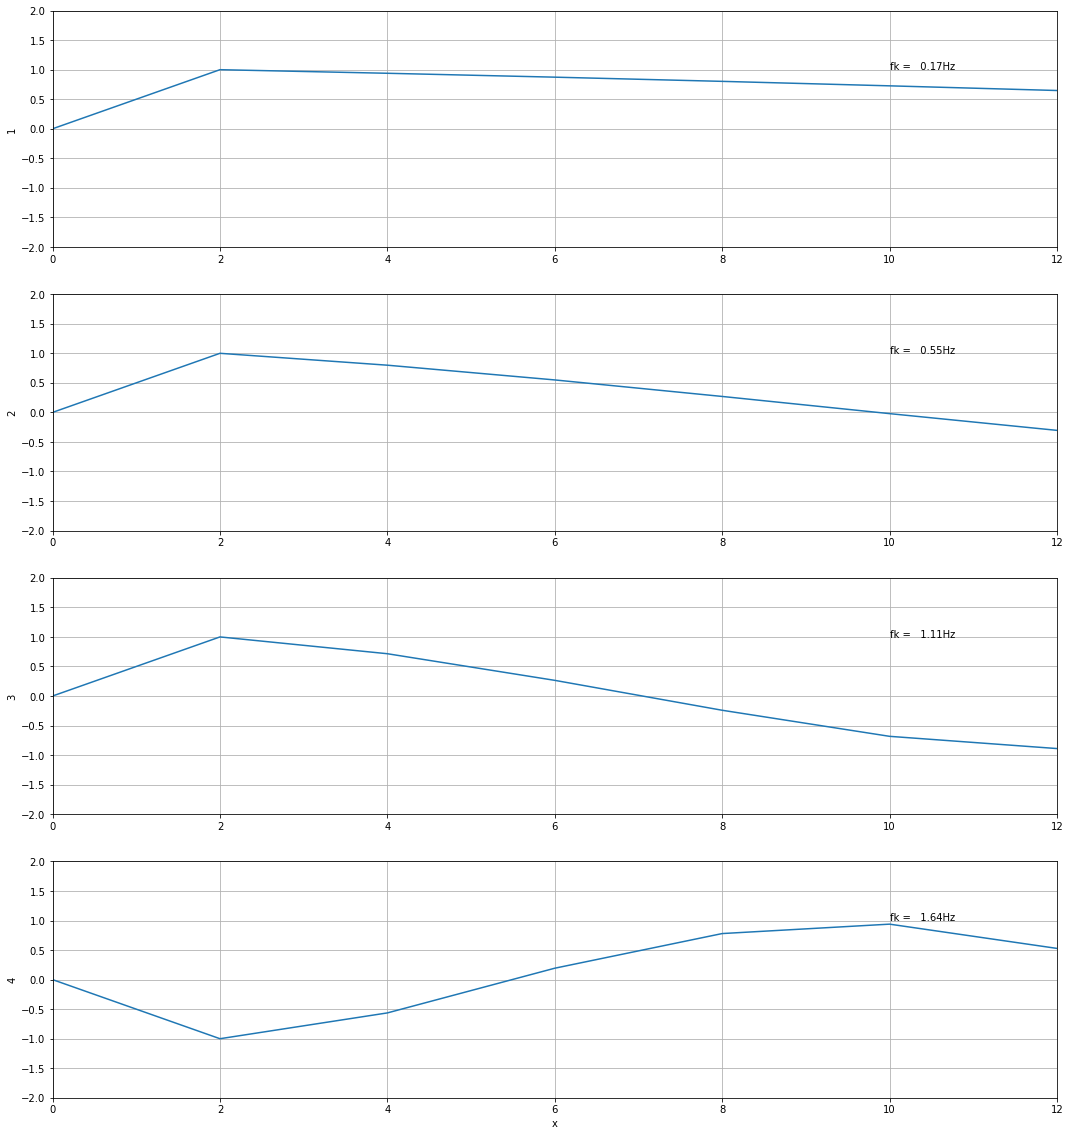

In [72]:
plt.figure(1, figsize=(18,20))
x = np.arange(0, 30, 2)

for k in range(4):
    pk = np.zeros(15)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 12.0);
    plt.ylim(-2,  2);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');

### 5. Resposta da estrutura a uma velocidade inicial

Considerando as frequências fundamentais, é possível verificar a resposta da estrutura à aplicação de uma força que atua no intervalo td = Tn/4, onde Tn é o menor período relacionado às frequências de vibração. Tal força é considerada como um impulso que age na estrutura provocando uma velocidade inicial. Aplicando uma força de 100 kN, verifica-se o valor da velocidade inicial.

In [55]:
fmax = np.max(fk1)
F = 100000
Tn = 1/fmax
td = Tn/4
m = 9600
v0 = (F*td)/m
print('A velocidade inicial é =',v0)

v0_v = [v0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
u0_v = np.zeros(13)

A velocidade inicial é = 0.39101440458943454


### 6. Gráfico u(t)

Umax = -0.8539200031277545


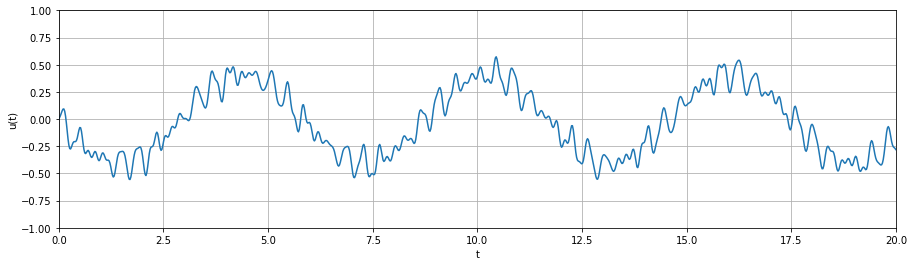

In [59]:
Phit = Phi1.transpose()   
xi = np.pi/2
UMAX = np.zeros(13)
    
for k in range (13):
    Mi = np.dot(np.dot(Phit[k], M1), phi[k])
    umax = (np.dot(np.dot(Phit[k], M1),v0_v)) / (wk1[k]*np.sin(xi)*Mi)
    
    UMAX[k] = umax
    
t = np.linspace(0,20,1000)
uk = np.zeros((13,1000))

for k in range(13):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(phi, uk)

print('Umax =',UMAX[0])

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:])
plt.xlim(0.0, 20.0); plt.xlabel('t');
plt.ylim(-1, 1); plt.ylabel('u(t)');
plt.grid(True)

### 7. Matriz de Amortecimento (C)
A matriz de amortecimento é uma combinação linear das matrizes de massa e rigidez:

In [73]:
zeta = np.zeros(13)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (11):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print('C =',zeta)

C = [0.01       0.01       0.01306883 0.02116547 0.02979696 0.03772109
 0.04665303 0.05944111 0.06384606 0.06787805 0.07494631 0.08344907
 0.09188498]
